In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
idealista = pd.read_csv('../data/df_idealista_FINAL.csv')

In [3]:
idealista.head()

,Unnamed: 0,city,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
0,0,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,2300000
1,1,Barcelona,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,1750000
2,2,Barcelona,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,590000
3,3,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,450000
4,4,Barcelona,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,Multiple,430000


In [4]:
idealista.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
idealista.head()

,city,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
0,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,2300000
1,Barcelona,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,1750000
2,Barcelona,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,590000
3,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,450000
4,Barcelona,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,Multiple,430000


### Plotting Correlations (Numerical Variables)

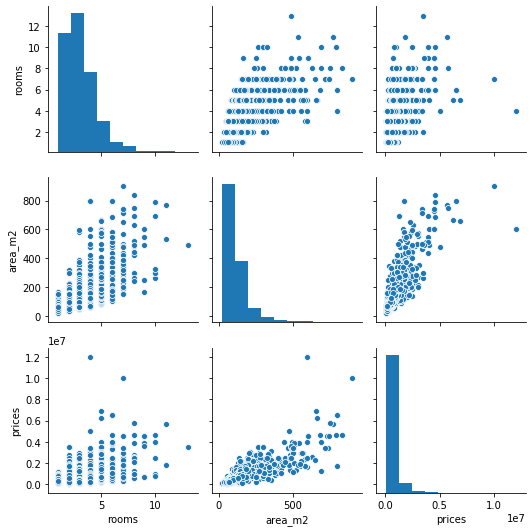

In [6]:
sns.pairplot(data=idealista)
plt.tight_layout()
plt.show()

### Looking for Collinearity

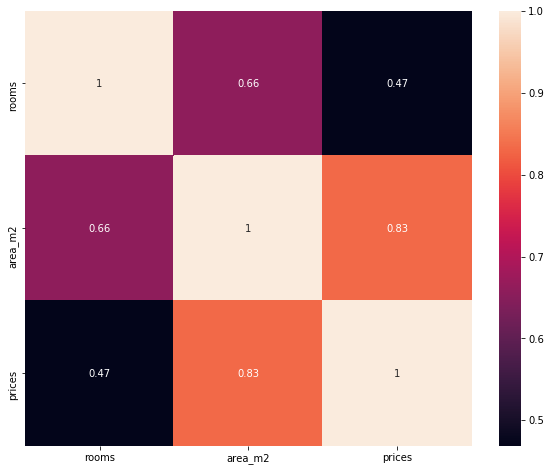

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(data=idealista.corr(), annot=True)
plt.show()

### Predicting House Prices

In [8]:
#assigning idealista to df
df = idealista.drop(['city','neighborhood','floor'], axis=1)
df.head(1)

,district,condition,type,rooms,area_m2,lift,views,prices
0,Eixample,good condition,Flat,3,351,Yes,exterior,2300000


In [9]:
#define X and y (features and target)
X = df.drop('prices', axis=1)
y = df['prices']

### Pre-processing Categorical Features

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [11]:
#Define columns to use
ordinal_cols = ['condition']
oneHot_cols = ['district','type','lift','views']
categ_cols = ordinal_cols + oneHot_cols

#Define categories order for ordinal columns
condition_cats = ['needs refurb','good condition','new']

# Initialize transformers
ord_enc = OrdinalEncoder(categories = [condition_cats])
oneH = OneHotEncoder(handle_unknown = "ignore")

# Assemble the "Column Transformer"
categ_encode_pipeline = ColumnTransformer([
    ("ord_encoder_branch", ord_enc, ordinal_cols),
    ("oneH_encoder_branch", oneH, oneHot_cols)])

### Fit-Transform Categorical Columns

In [12]:
X_cat = categ_encode_pipeline.fit_transform(df[categ_cols])

In [13]:
categ_encode_pipeline.named_transformers_["oneH_encoder_branch"].get_feature_names()

array(['x0_Ciutat Vella', 'x0_Eixample', 'x0_Gràcia', 'x0_Horta-Guinardó',
       'x0_Les Corts', 'x0_Nou Barris', 'x0_Sant Andreu', 'x0_Sant Martí',
       'x0_Sants-Montjuïc', 'x0_Sarrià-Sant Gervasi', 'x1_Detached',
       'x1_Duplex', 'x1_Flat', 'x1_Penthouse', 'x1_Semi-detached',
       'x1_Terraced', 'x2_No', 'x2_Yes', 'x3_exterior', 'x3_interior'],
      dtype=object)

In [14]:
pd.DataFrame(X_cat.todense())

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3260,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3261,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Pre-processing Numerical Features 

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# Define columns to use
num_cols = ['rooms','area_m2']

# Initialize StandardScaler
std_scaler = StandardScaler()

# Assemble the "Column Transformer"
scaler_pipeline = ColumnTransformer([
    ('std_encoder_branch',std_scaler, num_cols)])

In [17]:
X_num = scaler_pipeline.fit_transform(df[num_cols])

In [18]:
pd.DataFrame(X_num)

,0,1
0,-0.120943,2.474634
1,1.388644,1.903014
2,-0.875736,-0.340325
3,-0.875736,0.091087
4,-0.120943,-0.124619
...,...,...
3259,-1.630530,-0.620742
3260,-0.120943,-0.243257
3261,0.633851,0.058731
3262,-0.120943,-0.620742


### Assamble Pipeline (Categorical & Numerical)

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
preproc_pipeline = ColumnTransformer([
    ('categ_pipe',categ_encode_pipeline, categ_cols),
    ('scaler', scaler_pipeline, num_cols)
])
preproc_pipeline

ColumnTransformer(transformers=[('categ_pipe',
                                 ColumnTransformer(transformers=[('ord_encoder_branch',
                                                                  OrdinalEncoder(categories=[['needs '
                                                                                              'refurb',
                                                                                              'good '
                                                                                              'condition',
                                                                                              'new']]),
                                                                  ['condition']),
                                                                 ('oneH_encoder_branch',
                                                                  OneHotEncoder(handle_unknown='ignore'),
                                                                  ['

### Split Data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

### Importing modules

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from joblib import dump, load
from sklearn.metrics import mean_squared_error

### Training Models

#### KNN

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
full_pipeline = Pipeline([
    ('preproc_pipeline',preproc_pipeline),
    ('knn_model',KNeighborsRegressor())
])

In [35]:
full_pipeline.fit(X_train,y_train)
preds = full_pipeline.predict(X_train)

In [36]:
r2_score(preds,y_train)

0.7691395282239702

In [79]:
### Applying cross-validation - defining grid
grid = {
    "knn_model__n_neighbors" : [7,9,11],
    "knn_model__weights" : ['uniform','distance'],
    "knn_model__leaf_size" : [10,20],
    "knn_model__p" : [1,2]
}

In [80]:
neigh_search = GridSearchCV(full_pipeline, param_grid = grid, scoring='r2', cv=10)

In [81]:
neigh_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preproc pipeline',
                                        ColumnTransformer(transformers=[('categ_pipe',
                                                                         ColumnTransformer(transformers=[('ord_encoder_branch',
                                                                                                          OrdinalEncoder(categories=[['needs '
                                                                                                                                      'refurb',
                                                                                                                                      'good '
                                                                                                                                      'condition',
                                                                                                                                 

In [82]:
neigh_search.best_params_

{'knn_model__leaf_size': 10,
 'knn_model__n_neighbors': 11,
 'knn_model__p': 2,
 'knn_model__weights': 'distance'}

In [86]:
neigh_search.best_score_

0.753299354030676

In [99]:
preds = neigh_search.predict(X_test)
r2_score(preds,y_test)

0.4742401698376114

#### Saving model 

In [88]:
dump(neigh_search, "pickle//knn_model.pkl")

['pickle//knn_model.pkl']

---

#### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [101]:
full_pipeline = Pipeline([
    ('preproc_pipeline',preproc_pipeline),
    ('lr_model',LinearRegression())
])

In [102]:
full_pipeline.fit(X_train,y_train)
preds = full_pipeline.predict(X_train)

In [103]:
r2_score(preds,y_train)

0.650824269358315

In [104]:
### Applying cross-validation - defining grid
grid = {
    "lr_model__fit_intercept" : [True,False],
    "lr_model__normalize" : [True,False],
    "lr_model__copy_X" : [True,False],
    "lr_model__n_jobs" : [2,5,7,10]
}

In [105]:
lin_search = GridSearchCV(full_pipeline, param_grid = grid, scoring='r2', cv=10)

In [107]:
lin_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preproc pipeline',
                                        ColumnTransformer(transformers=[('categ_pipe',
                                                                         ColumnTransformer(transformers=[('ord_encoder_branch',
                                                                                                          OrdinalEncoder(categories=[['needs '
                                                                                                                                      'refurb',
                                                                                                                                      'good '
                                                                                                                                      'condition',
                                                                                                                                 

In [108]:
preds = lin_search.predict(X_train)
r2_score(preds,y_train)

0.6508242693439383

In [109]:
lin_search.best_score_

0.7472557274687818

In [110]:
preds = lin_search.predict(X_test)
r2_score(preds,y_test)

0.4821304629098919

#### Saving model 

In [111]:
dump(lin_search, "pickle//lr_model.pkl")

['pickle//lr_model.pkl']

---

### Randon Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
full_pipeline = Pipeline([
    ('preproc_pipeline',preproc_pipeline),
    ('rand_forest_model',RandomForestRegressor())
])

In [32]:
full_pipeline.fit(X_train,y_train)
preds = full_pipeline.predict(X_train)

In [33]:
r2_score(y_train,preds)

0.9546131653013683

In [34]:
### Applying cross-validation - defining grid
grid = {
    "rand_forest_model__n_estimators" : [150,300],
    "rand_forest_model__criterion" : ['mae'],
    "rand_forest_model__min_samples_split" : [2,4],
    "rand_forest_model__min_samples_leaf" : [1]
}

In [35]:
rand_search = GridSearchCV(full_pipeline, param_grid = grid, scoring='r2', cv=5, n_jobs = - 1)

In [36]:
rand_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc pipeline',
                                        ColumnTransformer(transformers=[('categ_pipe',
                                                                         ColumnTransformer(transformers=[('ord_encoder_branch',
                                                                                                          OrdinalEncoder(categories=[['needs '
                                                                                                                                      'refurb',
                                                                                                                                      'good '
                                                                                                                                      'condition',
                                                                                                                                  

In [37]:
rand_search.best_params_

{'rand_forest_model__criterion': 'mae',
 'rand_forest_model__min_samples_leaf': 1,
 'rand_forest_model__min_samples_split': 2,
 'rand_forest_model__n_estimators': 150}

In [38]:
rand_search.best_score_

0.7150730361241628

In [39]:
preds = rand_search.predict(X_test)
r2_score(y_test,preds)

0.7674836733836993

In [52]:
mean_squared_error(y_test,preds, squared=False)

222851.2545919803

#### Saving model 

In [55]:
dump(rand_search, "pickle//rand_forest_model.pkl")

['pickle//rand_forest_model.pkl']

---

### Support Vector Regression

In [27]:
from sklearn.svm import SVR

In [126]:
full_pipeline = Pipeline([
    ('preproc_pipeline',preproc_pipeline),
    ('svr_model',SVR())
])

In [127]:
full_pipeline.fit(X_train,y_train)
preds = full_pipeline.predict(X_train)

In [128]:
r2_score(y_train,preds)

-0.07552626009698149

In [129]:
### Applying cross-validation - defining grid
grid = {
    "svr_model__gamma" : ['scale'],
    "svr_model__coef0" : [0],
    "svr_model__C" : [100000000]
}

In [32]:
svr_search = GridSearchCV(full_pipeline, param_grid = grid, scoring='r2', cv=10)

In [33]:
svr_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preproc pipeline',
                                        ColumnTransformer(transformers=[('categ_pipe',
                                                                         ColumnTransformer(transformers=[('ord_encoder_branch',
                                                                                                          OrdinalEncoder(categories=[['needs '
                                                                                                                                      'refurb',
                                                                                                                                      'good '
                                                                                                                                      'condition',
                                                                                                                                 

In [47]:
svr_search.best_params_

{'svr_model__C': 100000000, 'svr_model__coef0': 0, 'svr_model__gamma': 'scale'}

In [131]:
svr_search.best_score_

0.679717211847847

In [36]:
preds = svr_search.predict(X_test)
r2_score(y_test,preds)

0.6419101280685697

#### Saving model 


In [132]:
dump(svr_search, "pickle//svr_model.pkl")

['pickle//svr_model.pkl']

---

### XGB Regressor

In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [92]:
full_pipeline = Pipeline([
    ('preproc_pipeline',preproc_pipeline),
    ('xgb_regressor',XGBRegressor())
])

In [84]:
# Training the model
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preproc_pipeline',
                 ColumnTransformer(transformers=[('categ_pipe',
                                                  ColumnTransformer(transformers=[('ord_encoder_branch',
                                                                                   OrdinalEncoder(categories=[['needs '
                                                                                                               'refurb',
                                                                                                               'good '
                                                                                                               'condition',
                                                                                                               'new']]),
                                                                                   ['condition']),
                                                                                  ('oneH_e

In [85]:
# training score
score = full_pipeline.score(X_train,y_train)
score

0.9785966826203286

In [86]:
# Applying cross validation
cv_score = cross_val_score(full_pipeline,X_train,y_train, cv=10)

In [87]:
# Cross validation score
cv_score

array([0.83364649, 0.54174844, 0.67251659, 0.74747307, 0.72088575,
       0.76166402, 0.78840383, 0.53951696, 0.16149994, 0.76129837])

In [88]:
# Mean score
cv_score.max()

0.8336464867424113

In [89]:
# Checking test predictions
preds = full_pipeline.predict(X_test)
r2_score(y_test,preds)

0.7358826972262815

In [126]:
# Defining Grid
grid = {
    "xgb_regressor__max_depth" : [2,6,8,10],
    "xgb_regressor__n_estimators" : [12,25,50,100],
    "xgb_regressor__min_child_weight" : [1,2,3],
    "xgb_regressor__num_parallel_tree" : [1,2,3],
    "xgb_regressor__scale_pos_weight" : [1,2],
    "xgb_regressor__tree_method" : ['auto','exact']
}

In [127]:
xgb_search = GridSearchCV(full_pipeline, param_grid = grid, scoring='r2', cv=10)

In [128]:
xgb_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preproc_pipeline',
                                        ColumnTransformer(transformers=[('categ_pipe',
                                                                         ColumnTransformer(transformers=[('ord_encoder_branch',
                                                                                                          OrdinalEncoder(categories=[['needs '
                                                                                                                                      'refurb',
                                                                                                                                      'good '
                                                                                                                                      'condition',
                                                                                                                                 

In [129]:
xgb_search.best_params_

{'xgb_regressor__max_depth': 2,
 'xgb_regressor__min_child_weight': 1,
 'xgb_regressor__n_estimators': 25,
 'xgb_regressor__num_parallel_tree': 1,
 'xgb_regressor__scale_pos_weight': 1,
 'xgb_regressor__tree_method': 'auto'}

In [130]:
xgb_search.best_score_

0.7236830656748825

In [131]:
preds = xgb_search.predict(X_test)
r2_score(y_test,preds)

0.7419671847895588

#### Saving Model

In [132]:
dump(xgb_search, "pickle//xgb_model.pkl")

['pickle//xgb_model.pkl']

### Loading Model

#### Random Forest Model

In [26]:
Rand_model = load("models/rand_forest_model.pkl")

In [27]:
Rand_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc pipeline',
                                        ColumnTransformer(transformers=[('categ_pipe',
                                                                         ColumnTransformer(transformers=[('ord_encoder_branch',
                                                                                                          OrdinalEncoder(categories=[['needs '
                                                                                                                                      'refurb',
                                                                                                                                      'good '
                                                                                                                                      'condition',
                                                                                                                                  

In [28]:
Rand_model.best_score_

0.7150730361241628

#### XGB Regressor

In [39]:
XGB_model = load("models/xgb_model.pkl")

In [40]:
XGB_model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preproc_pipeline',
                                        ColumnTransformer(transformers=[('categ_pipe',
                                                                         ColumnTransformer(transformers=[('ord_encoder_branch',
                                                                                                          OrdinalEncoder(categories=[['needs '
                                                                                                                                      'refurb',
                                                                                                                                      'good '
                                                                                                                                      'condition',
                                                                                                                                 